In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


In [3]:
#url = '/content/winequality-red.csv'
wine_data = pd.read_csv('/content/winequality-red.csv')

In [4]:
wine_data.shape

(1599, 12)

In [5]:
wine_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [6]:
wine_data.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5
1598,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6


In [7]:
wine_data.isnull().sum()

,0
fixed acidity,0
volatile acidity,0
citric acid,0
residual sugar,0
chlorides,0
free sulfur dioxide,0
total sulfur dioxide,0
density,0
pH,0
sulphates,0


In [8]:
wine_data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [9]:
# Combine all columns into a single column using ','.join
wine_data['combined'] = wine_data[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality']].apply(lambda row: ','.join(row.values.astype(str)), axis=1)
# Now you can split this combined column
wine_data = wine_data['combined'].str.split(',', expand=True)

In [10]:
new_columns = ['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar', 'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality']

In [11]:
wine_data.columns = new_columns

In [12]:

wine_data['quality'] = wine_data['quality'].astype(float).astype(int)

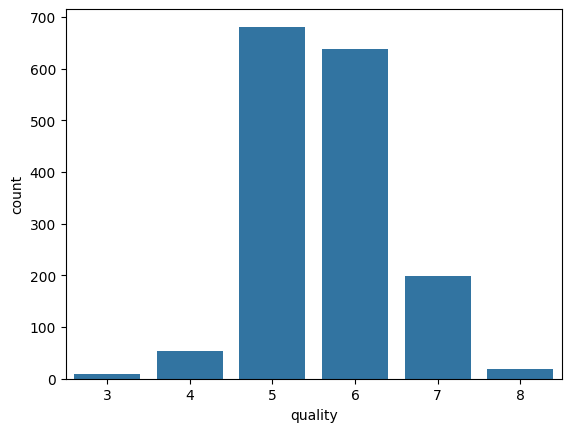

In [13]:
sns.countplot(x='quality', data=wine_data)
plt.show()

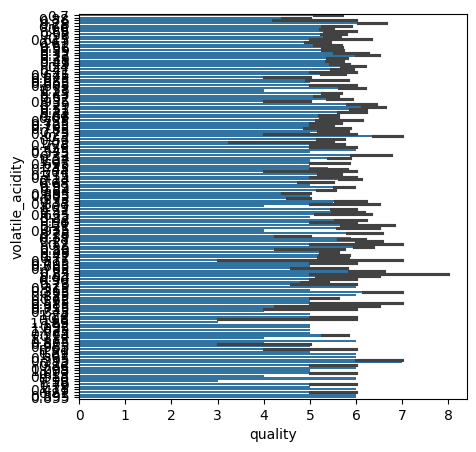

In [14]:
plot = plt.figure(figsize=(5, 5))
sns.barplot(x='quality', y='volatile_acidity', data=wine_data)
plt.show()

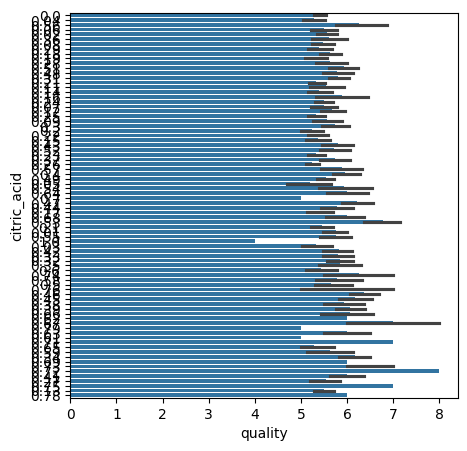

In [15]:
plot = plt.figure(figsize=(5, 5))
sns.barplot(x='quality', y='citric_acid', data=wine_data)
plt.show()

In [16]:
correlation = wine_data.corr()

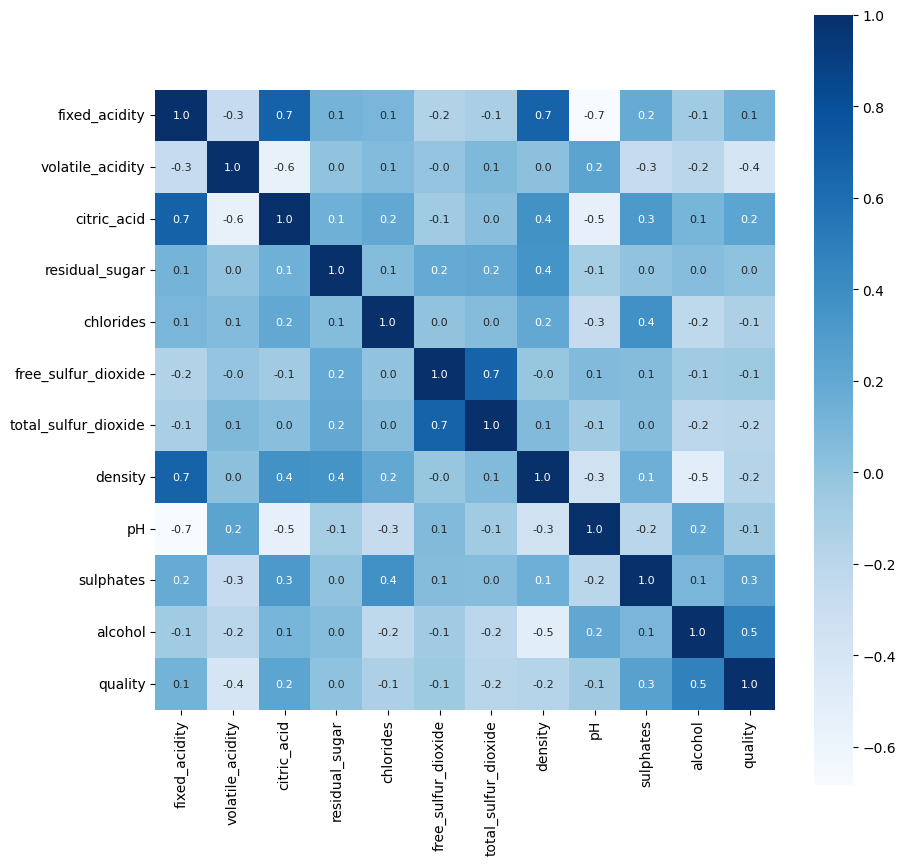

In [17]:
plt.figure(figsize=(10, 10))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size': 8}, cmap='Blues')
plt.show()

In [18]:
X = wine_data.drop('quality', axis=1)

In [19]:
print(X)

     fixed_acidity volatile_acidity citric_acid residual_sugar chlorides  \
0              7.4              0.7         0.0            1.9     0.076   
1              7.8             0.88         0.0            2.6     0.098   
2              7.8             0.76        0.04            2.3     0.092   
3             11.2             0.28        0.56            1.9     0.075   
4              7.4              0.7         0.0            1.9     0.076   
...            ...              ...         ...            ...       ...   
1594           6.2              0.6        0.08            2.0      0.09   
1595           5.9             0.55         0.1            2.2     0.062   
1596           6.3             0.51        0.13            2.3     0.076   
1597           5.9            0.645        0.12            2.0     0.075   
1598           6.0             0.31        0.47            3.6     0.067   

     free_sulfur_dioxide total_sulfur_dioxide  density    pH sulphates alcohol  
0     

In [20]:
Y = wine_data['quality'].astype(int).apply(lambda y_value: 1 if y_value >= 7 else 0)

In [21]:
print(Y)

0       0
1       0
2       0
3       0
4       0
       ..
1594    0
1595    0
1596    0
1597    0
1598    0
Name: quality, Length: 1599, dtype: int64


In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=3)

In [23]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import ipywidgets as widgets
from IPython.display import display

# Create a dropdown widget for scaler selection
scaler_dropdown = widgets.Dropdown(
    options=['StandardScaler', 'MinMaxScaler'],
    value='StandardScaler',
    description='Scaler:',
    disabled=False
)

# Function to apply the selected scaler
def apply_scaler(scaler_choice):
    global X_train_scaled, X_test_scaled

    if scaler_choice == 'StandardScaler':
        scaler = StandardScaler()
    else:
        scaler = MinMaxScaler()

    # Fit the scaler on training data and transform both train and test data
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    print(f"\nApplied {scaler_choice} successfully!")

# Button to run the function
run_scaler_button = widgets.Button(description="Apply Scaler")

# Define button click event
def on_scaler_button_click(b):
    apply_scaler(scaler_dropdown.value)

# Link button click to the event
run_scaler_button.on_click(on_scaler_button_click)

# Display the dropdown and button
display(scaler_dropdown, run_scaler_button)


Dropdown(description='Scaler:', options=('StandardScaler', 'MinMaxScaler'), value='StandardScaler')

Button(description='Apply Scaler', style=ButtonStyle())

In [24]:

try:
    X_train_scaled
except NameError:
    print("Please run the scaling section first to scale the data.")


Please run the scaling section first to scale the data.


In [25]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, Y_train)
knn_preds = knn.predict(X_test)
print("KNN Accuracy:", accuracy_score(Y_test, knn_preds))
print("classification report", classification_report(Y_test, knn_preds))


KNN Accuracy: 0.86875
classification report               precision    recall  f1-score   support

           0       0.91      0.95      0.93       283
           1       0.40      0.27      0.32        37

    accuracy                           0.87       320
   macro avg       0.65      0.61      0.62       320
weighted avg       0.85      0.87      0.86       320



In [26]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, Y_train)
dt_preds = dt.predict(X_test)
print("Decision Tree Accuracy:", accuracy_score(Y_test, dt_preds))
print(classification_report(Y_test, dt_preds))


Decision Tree Accuracy: 0.90625
              precision    recall  f1-score   support

           0       0.95      0.95      0.95       283
           1       0.59      0.59      0.59        37

    accuracy                           0.91       320
   macro avg       0.77      0.77      0.77       320
weighted avg       0.91      0.91      0.91       320



In [27]:
# Scale the data before SVM
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [28]:
from sklearn.svm import SVC
svm = SVC(kernel='rbf', random_state=42)
svm.fit(X_train, Y_train)
svm_preds = svm.predict(X_test)
print("SVM Accuracy:", accuracy_score(Y_test, svm_preds))
print(classification_report(Y_test, svm_preds))


SVM Accuracy: 0.921875
              precision    recall  f1-score   support

           0       0.94      0.98      0.96       283
           1       0.75      0.49      0.59        37

    accuracy                           0.92       320
   macro avg       0.84      0.73      0.77       320
weighted avg       0.91      0.92      0.91       320



In [29]:
# Make sure to run this cell and click "Run Logistic Regression" first.
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
import ipywidgets as widgets
from IPython.display import display

# Scale the data (ensure you've already done this step)
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create a dropdown widget for solver selection
solver_dropdown = widgets.Dropdown(
    options=['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'],
    value='lbfgs',
    description='Solver:',
    disabled=False
)

# Function to train and evaluate Logistic Regression with the selected solver
def run_logistic_regression(solver):
    print(f"\nRunning Logistic Regression with solver: '{solver}'")

    # Initialize the Logistic Regression model with the selected solver
    log_reg = LogisticRegression(solver=solver, max_iter=1000, random_state=42)

    # Fit the model on the scaled training data
    log_reg.fit(X_train_scaled, Y_train)

    # Make predictions on the test set
    global log_reg_pred # Declare log_reg_pred as global
    log_reg_pred = log_reg.predict(X_test_scaled)  # Assign the value to log_reg_pred

    # Evaluate the model
    accuracy = accuracy_score(Y_test, log_reg_pred)
    print(f"Accuracy: {accuracy:.4f}\n")
    print("Classification Report:")
    print(classification_report(Y_test, log_reg_pred))

# Button to run the function
run_button = widgets.Button(description="Run Logistic Regression")

# Define button click event
def on_button_click(b):
    run_logistic_regression(solver_dropdown.value)

# Link button click to the event
run_button.on_click(on_button_click)

# Display the dropdown and button
display(solver_dropdown, run_button)

Dropdown(description='Solver:', options=('lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'),…

Button(description='Run Logistic Regression', style=ButtonStyle())


Running Logistic Regression with solver: 'lbfgs'
Accuracy: 0.9125

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.98      0.95       283
           1       0.71      0.41      0.52        37

    accuracy                           0.91       320
   macro avg       0.82      0.69      0.73       320
weighted avg       0.90      0.91      0.90       320



In [30]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train, Y_train)
nb_preds = nb.predict(X_test)
print("Naïve Bayes Accuracy:", accuracy_score(Y_test, nb_preds))
print(classification_report(Y_test, nb_preds))


Naïve Bayes Accuracy: 0.85625
              precision    recall  f1-score   support

           0       0.95      0.88      0.92       283
           1       0.42      0.65      0.51        37

    accuracy                           0.86       320
   macro avg       0.69      0.77      0.71       320
weighted avg       0.89      0.86      0.87       320



In [31]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [32]:
rf = RandomForestClassifier()
rf.fit(X_train, Y_train)

RandomForestClassifier()

In [33]:
rf_preds = rf.predict(X_test)
test_data_accuracy = accuracy_score(rf_preds, Y_test)
print(f"Test Data Accuracy: {test_data_accuracy}")

Test Data Accuracy: 0.928125


In [34]:
# Perceptron Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

print("\nTraining Perceptron Model...")

perceptron = Sequential()
perceptron.add(Dense(units=1, input_dim=X_train_scaled.shape[1], activation='sigmoid'))

perceptron.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

history_perceptron = perceptron.fit(X_train_scaled, Y_train, epochs=10, batch_size=32, validation_data=(X_test_scaled, Y_test))

perceptron_score = perceptron.evaluate(X_test_scaled, Y_test)
print(f"Perceptron Accuracy on Test Data: {perceptron_score[1]:.4f}")






Training Perceptron Model...
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.4688 - loss: 0.8331 - val_accuracy: 0.4344 - val_loss: 0.8938
Epoch 2/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4747 - loss: 0.8338 - val_accuracy: 0.4812 - val_loss: 0.8525
Epoch 3/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5118 - loss: 0.7800 - val_accuracy: 0.5000 - val_loss: 0.8149
Epoch 4/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5452 - loss: 0.7425 - val_accuracy: 0.5469 - val_loss: 0.7790
Epoch 5/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5781 - loss: 0.7068 - val_accuracy: 0.5906 - val_loss: 0.7466
Epoch 6/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6267 - loss: 0.6861 - val_accuracy: 0.6156 - val_loss: 0.7177
Epoch 7/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6415 - loss: 0.6968 - val_accuracy: 0.6531 - val_loss: 0.6895
Epoch 8/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6839 - loss: 0.6412 - val_accuracy: 0.6938 - val_loss: 0.6658
Epo

In [35]:
# Multi-Layer Perceptron (MLP) Model
print("\nTraining Multi-Layer Perceptron (MLP) Model...")

mlp = Sequential()
mlp.add(Dense(units=20, input_dim=X_train_scaled.shape[1], activation='relu'))
mlp.add(Dense(units=10, activation='relu'))
mlp.add(Dense(units=1, activation='sigmoid'))

mlp.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

history_mlp = mlp.fit(X_train_scaled, Y_train, epochs=10, batch_size=32, validation_data=(X_test_scaled, Y_test))

mlp_score = mlp.evaluate(X_test_scaled, Y_test)
print(f"MLP Accuracy on Test Data: {mlp_score[1]:.4f}")


Training Multi-Layer Perceptron (MLP) Model...
Epoch 1/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.8015 - loss: 0.5500 - val_accuracy: 0.8750 - val_loss: 0.4320
Epoch 2/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8630 - loss: 0.4399 - val_accuracy: 0.8813 - val_loss: 0.3484
Epoch 3/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8603 - loss: 0.3798 - val_accuracy: 0.8906 - val_loss: 0.2948
Epoch 4/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8598 - loss: 0.3426 - val_accuracy: 0.8906 - val_loss: 0.2627
Epoch 5/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8760 - loss: 0.2920 - val_accuracy: 0.8938 - val_loss: 0.2514
Epoch 6/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8809 - loss: 0.2805 - val_accuracy: 0.9000 - val_loss: 0.2423
Epoch 7/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8847 - loss: 0.2690 - val_accuracy: 0.9000 - val_loss: 0.2397
Epoch 8/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8653 -

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


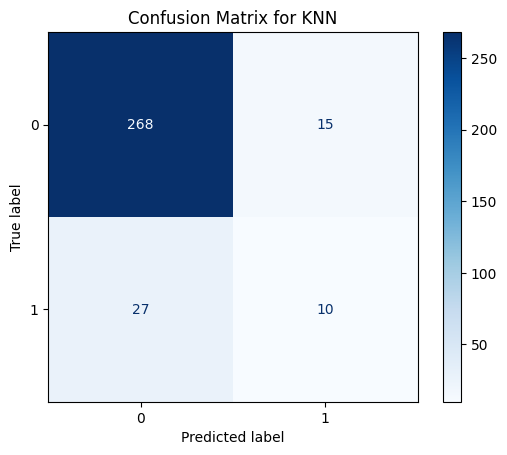

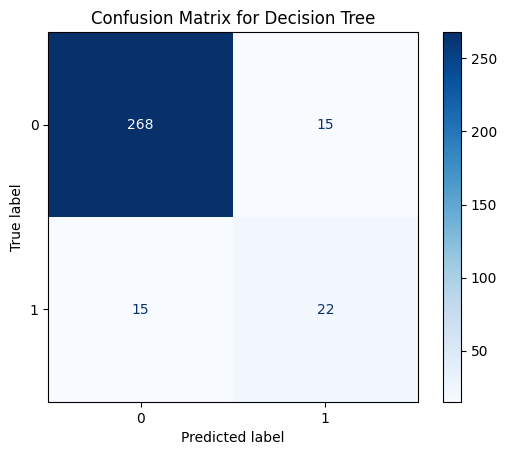

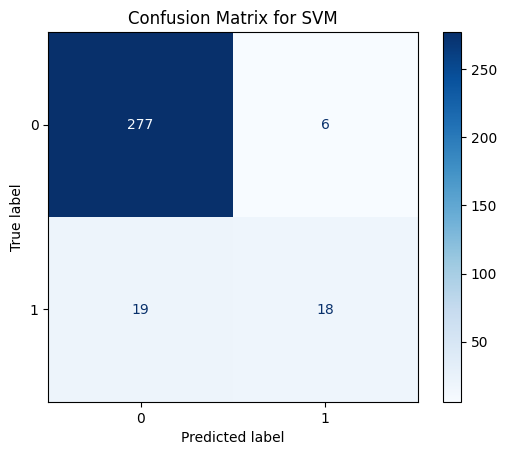

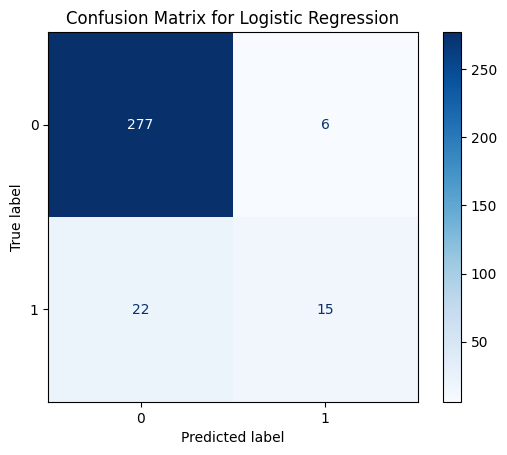

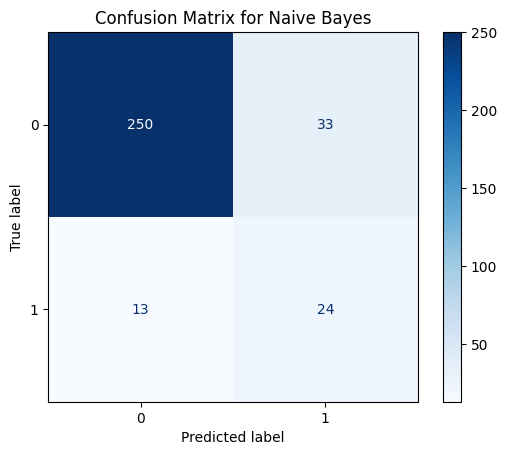

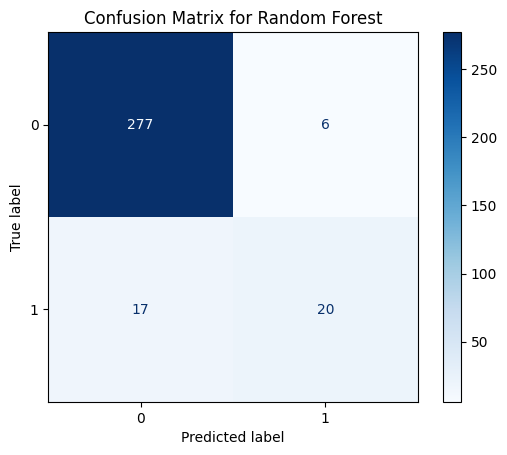

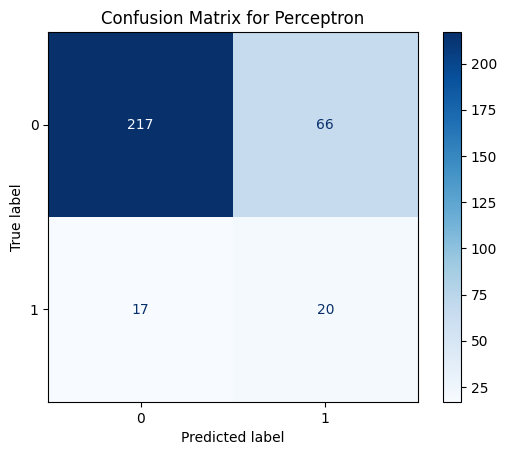

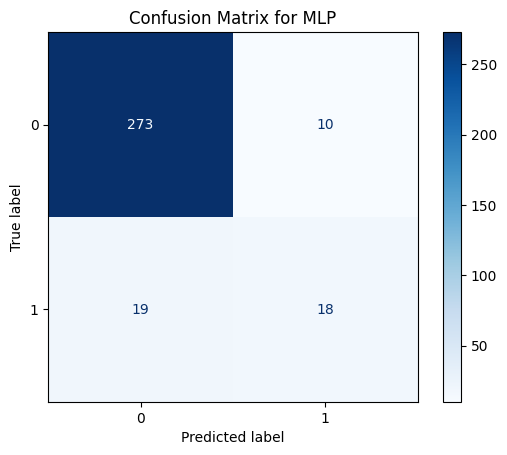

In [37]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# List of model predictions and labels
models = {
    "KNN": knn_preds,
    "Decision Tree": dt_preds,
    "SVM": svm_preds,
    "Logistic Regression": log_reg_pred,
    "Naive Bayes": nb_preds,
    "Random Forest": rf_preds,
    "Perceptron": (perceptron.predict(X_test_scaled) > 0.5).astype("int32"),  # Use predict and threshold
    "MLP": (mlp.predict(X_test_scaled) > 0.5).astype("int32")  # Use predict and threshold
}

for model_name, preds in models.items():
    cm = confusion_matrix(Y_test, preds)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=sorted(Y_test.unique()))
    disp.plot(cmap='Blues')
    plt.title(f"Confusion Matrix for {model_name}")
    plt.show()




In [38]:
from sklearn.preprocessing import StandardScaler
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


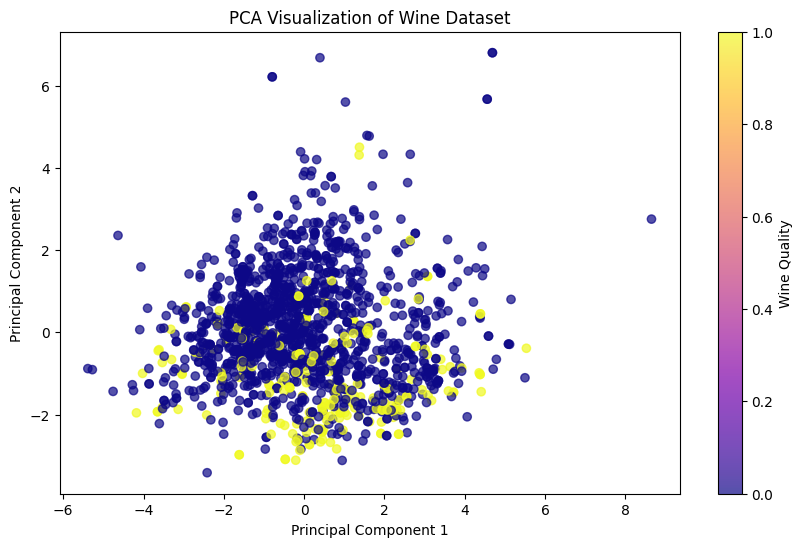

Explained variance ratio: [0.28173931 0.1750827 ]


In [39]:
#UNSUPERVISED LEARNING SECTION
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA for 2 components
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Visualize the first two principal components
plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=Y, cmap='plasma', alpha=0.7)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Visualization of Wine Dataset')
plt.colorbar(label='Wine Quality')
plt.show()

# Explained variance ratio
print("Explained variance ratio:", pca.explained_variance_ratio_)


# WORKING ON THE INTERFACE

In [59]:
model = RandomForestClassifier()
model.fit(X_train, Y_train)

RandomForestClassifier()

In [60]:
import pickle
pickle.dump(model,open('model.pkl','wb'))
pickle.dump(scaler,open('scaler.pkl','wb'))

In [61]:
model = pd.read_pickle("model.pkl")
scaler = pd.read_pickle("scaler.pkl")

In [62]:
!pip install streamlit

In [63]:
import streamlit as st
import pandas as pd
import numpy as np
import pickle

# Load the model and scaler
with open(r'/content/model.pkl', 'rb') as model_file:
    model = pickle.load(model_file)
with open(r'/content/scaler.pkl', 'rb') as scaler_file:
    scaler = pickle.load(scaler_file)

# Streamlit app
st.title('Wine Quality Prediction')

# Input features for a good wine example
fixed_acidity = st.slider('Fixed Acidity', 4.0, 16.0, 8.5)
volatile_acidity = st.slider('Volatile Acidity', 0.1, 1.5, 0.3)
citric_acid = st.slider('Citric Acid', 0.0, 1.0, 0.4)
residual_sugar = st.slider('Residual Sugar', 0.0, 15.0, 2.5)
chlorides = st.slider('Chlorides', 0.01, 0.2, 0.045)
free_sulfur_dioxide = st.slider('Free Sulfur Dioxide', 1.0, 72.0, 30.0)
total_sulfur_dioxide = st.slider('Total Sulfur Dioxide', 6.0, 289.0, 100.0)
density = st.slider('Density', 0.9900, 1.0050, 0.9950)
pH = st.slider('pH', 2.8, 4.0, 3.3)
sulphates = st.slider('Sulphates', 0.3, 2.0, 0.7)
alcohol = st.slider('Alcohol', 8.0, 15.0, 12.5)

# Create a dataframe for the input features
input_data = pd.DataFrame([[fixed_acidity, volatile_acidity, citric_acid, residual_sugar, chlorides, free_sulfur_dioxide, total_sulfur_dioxide, density, pH, sulphates, alcohol]], columns=['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar', 'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density', 'pH', 'sulphates', 'alcohol'])

# Scale the input features
input_data_scaled = scaler.transform(input_data)

# Predict the quality
if st.button('Predict Quality'):
    prediction = model.predict(input_data_scaled)
    quality = 'Good Wine' if prediction[0] == 1 else 'Bad Wine'
    st.write(f'The predicted quality of the wine is: {quality}')


2024-12-13 20:39:57.751 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-13 20:39:57.752 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-13 20:39:57.756 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-13 20:39:57.760 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-13 20:39:57.762 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-13 20:39:57.765 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-13 20:39:57.766 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-13 20:39:57.767 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar

In [64]:
!pip install pyngrok

In [65]:
import subprocess
from pyngrok import ngrok, conf

# Set your authtoken
conf.get_default().auth_token = "2pl5DhywUpovmqGFElBZMCEpO3l_5DK6DGMTpQqnjCYhrNMmk"

# **Check for existing tunnels and kill them if needed**
tunnels = ngrok.get_tunnels()
for tunnel in tunnels:
    print(f"Killing existing tunnel: {tunnel.public_url}")  # Optional: Print tunnel info before killing
    ngrok.disconnect(tunnel.public_url)

# Start Streamlit
streamlit_process = subprocess.Popen(['streamlit', 'run', '/content/wine_app.py'])

# Set up ngrok tunnel
public_url = ngrok.connect(addr='8501')
print(f"ngrok http --url=above-lately-scorpion.ngrok-free.app 80: {public_url}")

Killing existing tunnel: https://3557-34-80-1-247.ngrok-free.app
ngrok http --url=above-lately-scorpion.ngrok-free.app 80: NgrokTunnel: "https://15f3-34-80-1-247.ngrok-free.app" -> "http://localhost:8501"
